<a href="https://colab.research.google.com/github/KezhenLi/Homework4/blob/main/homework4.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#(a) At junction V1, from Ohm's law and Kirchhoff's current law, (V+ - V1)/R = (V1-v3)/R + (V1-V3)/R, then 3V1 - V2 - V3 = V+:
# Do the same calculation for junction V2, V3,.....,VN, we can get those equations. Express them in vector form Av=w,
# A = ((3 -1 -1 0 ... 0) (-1 4 -1 -1 ... 0)... (0 ... -1 -1 4 -1) (0 ... 0 -1 -1 3), w = (V+ V+ 0 ... 0)

In [20]:
#(b)(c)
from numpy import copy, empty, zeros
from pylab import plot, show

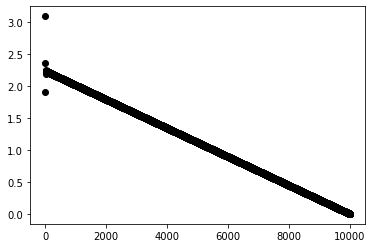

In [21]:
def banded(Aa,va,up,down):

    # Copy the inputs and determine the size of the system
    A = copy(Aa)
    v = copy(va)
    N = len(v)

    # Gaussian elimination
    for m in range(N):

        # Normalization factor
        div = A[up,m]

        # Update the vector first
        v[m] /= div
        for k in range(1,down+1):
            if m+k<N:
                v[m+k] -= A[up+k,m]*v[m]

        # Now normalize the pivot row of A and subtract from lower ones
        for i in range(up):
            j = m + up - i
            if j<N:
                A[i,j] /= div
                for k in range(1,down+1):
                    A[i+k,j] -= A[up+k,m]*A[i,j]

    # Backsubstitution
    for m in range(N-2,-1,-1):
        for i in range(up):
            j = m + up - i
            if j<N:
                v[m] -= A[i,j]*v[j]

    return v


# Constants
N = 10000
V = 5 

# Set up the initial calues of the arrays
A = empty([5, N], float)
A[2, 0] = A[2, N-1] = 3
for i in range(2, N):
    A[0, i] = -1
for i in range(1, N):
    A[1, i] = -1
for i in range(1, N-1):
    A[2, i] = 4
for i in range(N-1):
    A[3, i] = -1
for i in range(N-2):
    A[4, i] = -1
w = zeros(N)
w[0] = b[1] = V

# solve the equations
x = banded(A, w, 2, 2)

# Make a plot
plot(x, 'ko')
show()
 